In [35]:
##Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#Read csv file
df = pd.read_csv('Resources/random_sample_1.csv')
df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']] = df[['SR Create TS', 'SR Close TS', 'Cust Contact TS', 'CQ Applied TS']].astype('datetime64[ns]')

In [37]:
#Create new data with columns we're interested in
new_df = df[['OCPM #', 'Make/Miss', 'SR Create TS', 'SR Close TS', 'CQ Applied TS']]
new_df

,OCPM #,Make/Miss,SR Create TS,SR Close TS,CQ Applied TS
0,CLKDKDL,Make,2019-12-24 10:47:00,2019-12-27 10:18:00,2019-12-24 11:11:00
1,409QMTZ,Miss,2019-12-19 12:15:00,2020-01-10 15:51:00,2019-12-20 12:39:00
2,409RVRY,Miss,2020-01-02 15:10:00,2020-01-13 14:11:00,2020-01-02 18:53:00
3,409RW88,Make,2020-01-02 16:23:00,2020-01-06 15:51:00,2020-01-02 18:05:00
4,409PNY9,Miss,2019-12-13 23:57:00,2020-01-10 09:21:00,2019-12-15 22:05:00
...,...,...,...,...,...
373,409RF49,Miss,2019-12-27 15:19:00,2020-01-02 21:20:00,2019-12-27 16:09:00
374,409Q5D3,Miss,2019-12-17 10:08:00,2019-12-23 21:30:00,2019-12-17 10:27:00
375,409RFCW,Miss,2019-12-27 16:34:00,2020-01-08 13:33:00,2019-12-27 16:38:00
376,409STSQ,Make,2020-01-08 09:50:00,2020-01-10 11:53:00,2020-01-08 12:28:00


In [38]:
#Add column to hold difference between SR Close TS and SR Create TS
new_df['CX - RC'] = (new_df.loc[:, 'SR Close TS'] - new_df.loc[:, 'SR Create TS'])

#Add column to hold difference between CQ Applied TS and SR Create TS
new_df['CQ - RC'] = (new_df.loc[:, 'CQ Applied TS'] - new_df.loc[:, 'SR Create TS'])

#Convert new cols to decimals
for index, rows in new_df.iterrows():
    new_df.iloc[index, 5] = rows[5].days + rows[5].seconds/(24*60*60)
    new_df.iloc[index, 6] = rows[6].days + rows[6].seconds/(24*60*60)

#Convert to float
new_df[['CX - RC', 'CQ - RC']] = new_df[['CX - RC', 'CQ - RC']].astype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [39]:
#Descriptive statistics for SR and CQ differences
summary = pd.DataFrame({
    'CX - RC': round(new_df['CX - RC'].describe(),2),
    'CQ - RC': round(new_df['CQ - RC'].describe(),2)
})
summary

,CX - RC,CQ - RC
count,378.00,378.00
mean,12.46,0.48
std,10.76,2.05
min,0.00,0.00
25%,4.14,0.00
50%,8.11,0.03
75%,18.14,0.51
max,55.83,37.74


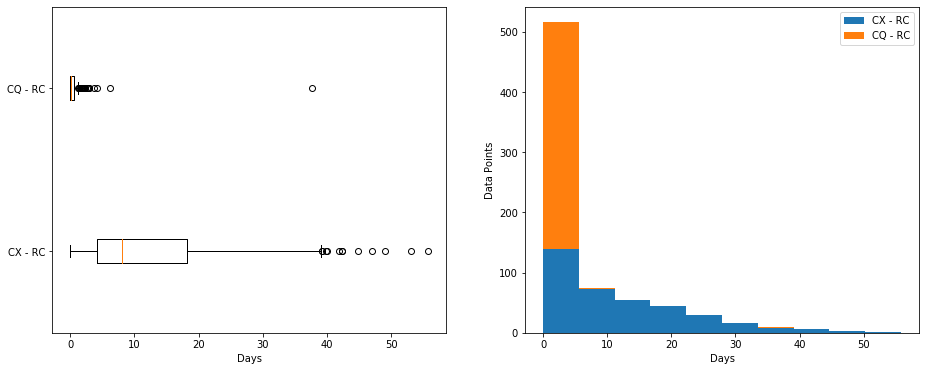

In [40]:
#Boxplot and histogram
data_CX = new_df['CX - RC']
data_RC = new_df['CQ - RC']
labels = ['CX - RC', 'CQ - RC']
plt.figure(figsize=(24,6))

#Boxplot
plt.subplot(131)
plt.boxplot([data_CX, data_RC], labels = labels, vert = False)
plt.xlabel('Days')

#Histogram
plt.subplot(132)
plt.hist([data_CX, data_RC], label = labels, stacked = True)
plt.xlabel('Days')
plt.ylabel('Data Points')
plt.legend()

plt.show()